# Seeking out Relationships

If we wanted to examine relationships between all quantities at once, we can use some built in plotting capabilities to examine pairwise scatterplots and correlations.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels as sm

In [8]:
ad = pd.read_csv('data/ads.csv', index_col = 0)

In [9]:
ad.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Pairplot will pair off the variables to each other 

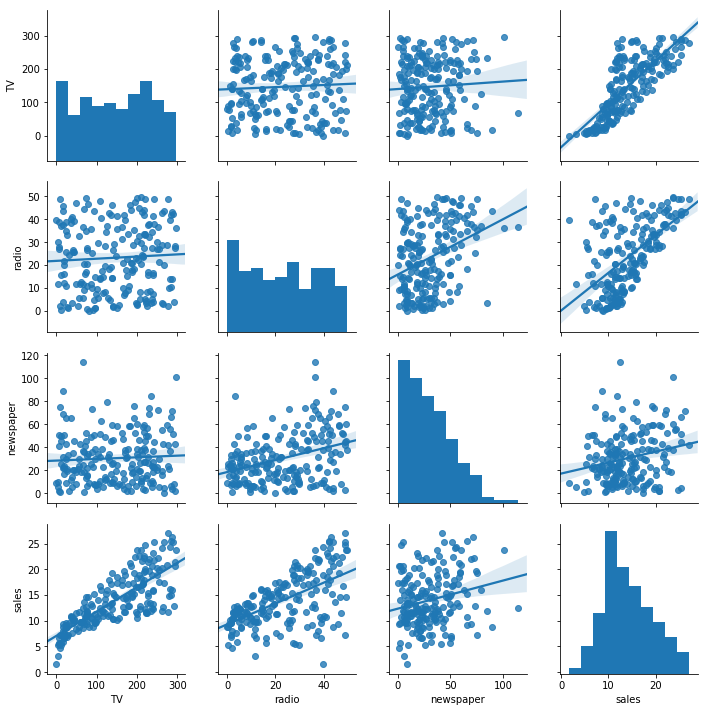

In [10]:
sns.pairplot(ad, kind = 'reg')

Below will give you all of hte R-squared values across the variables against each other 

In [11]:
cor_mat = ad.corr()
cor_mat

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


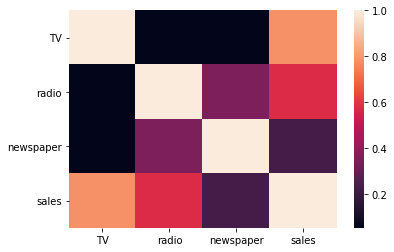

In [12]:
sns.heatmap(cor_mat)

### Multiple Regression

In [13]:
X = np.column_stack((ad.TV, ad.radio, ad.newspaper))

In [14]:
res = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = ad).fit()

In [16]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 29 Mar 2018   Prob (F-statistic):           1.58e-96
Time:                        20:08:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**PROBLEM**

Compare the performance of pairs of indicators (TV and Radio, TV and Newspaper, and Radio and Newspaper) to the model using all three.  What do you think this means?

In [23]:
res = smf.ols(formula = 'sales ~ TV + radio', data = ad).fit()

In [24]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 29 Mar 2018   Prob (F-statistic):           4.83e-98
Time:                        20:15:39   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**PROBLEM**

Use the dataset on housing prices in Ames Iowa to investigate relationships between variables.

1. Examine the data dictionary to understand variables (https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt)
2. Choose 4 quantitative variables and create a dataframe with these and sales prices
3. Examine a pairplot.  Does this give you a sense for the strongest relationship?
4. Generate a correlation matrix.  Does this suggest a similar relationship?
5. Evaluate a simple linear model $y = mx + b$ for each variable.
6. Develop a multiple linear regression model and compare this to the simple linear model.

In [25]:
ames = pd.read_csv('data/ames_housing.csv')

In [26]:
ames.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [28]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
ames.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
lotneighbor = smf.ols(formula = 'SalePrice ~ Neighborhood + LotArea', data = ames).fit()

In [47]:
lotneighbor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     76.99
Date:                Thu, 29 Mar 2018   Prob (F-statistic):          8.98e-244
Time:                        20:27:37   Log-Likelihood:                -17923.
No. Observations:                1460   AIC:                         3.590e+04
Df Residuals:                    1434   BIC:                         3.603e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.899e+05   1.27e+04     14.944      0.000    1.65e+05    2.15e+05
Neighborhood[T.Blueste] -5.479e+04   3.91e+04     -1.400      0.162   -1.32e+05     2.2e+04
Neighborhood[T.BrDale]  -8.806e+04   1.82e+04     -4.828      0.000   -1.24e+05   -5.23e+04
Neighborhood[T.BrkSide] -7.579e+04   1.45e+04     -5.244      0.000   -1.04e+05   -4.74e+04
Neighborhood[T.ClearCr] -2.223e+04   1.66e+04     -1.337      0.181   -5.48e+04    1.04e+04
Neighborhood[T.CollgCr] -5944.3982   1.34e+04     -0.443      0.658   -3.23e+04    2.04e+04
Neighborhood[T.Crawfor]  3531.6227   1.47e+04      0.240      0.810   -2.53e+04    3.24e+04
Neighborhood[T.Edwards] -7.656e+04   1.38e+04     -5.558      0.000   -1.04e+05   -4.95e+04
Neighborhood[T.Gilbert] -1.361e+04   1.41e+04     -0.969      0.333   -4.12e+04    1.39e+04
Neighborhood[T.IDOTRR]  -1.016e+05   1.54e+04     -6.615      0.000   -1.32e+05   -7.15e+04
Neighborhood[T.MeadowV] -9.473e+04    1.8e+04     -5.275      0.000    -1.3e+05   -5.95e+04
Neighborhood[T.Mitchel] -5.055e+04   1.48e+04     -3.418      0.001   -7.96e+04   -2.15e+04
Neighborhood[T.NAmes]   -5.882e+04   1.32e+04     -4.453      0.000   -8.47e+04   -3.29e+04
Neighborhood[T.NPkVill] -5.199e+04   2.16e+04     -2.409      0.016   -9.43e+04   -9646.300
Neighborhood[T.NWAmes]  -1.808e+04   1.42e+04     -1.277      0.202   -4.59e+04    9694.871
Neighborhood[T.NoRidge]  1.247e+05   1.52e+04      8.208      0.000    9.49e+04    1.55e+05
Neighborhood[T.NridgHt]  1.105e+05   1.41e+04      7.851      0.000    8.29e+04    1.38e+05
Neighborhood[T.OldTown] -7.363e+04   1.36e+04     -5.398      0.000      -1e+05   -4.69e+04
Neighborhood[T.SWISU]   -5.915e+04   1.65e+04     -3.590      0.000   -9.15e+04   -2.68e+04
Neighborhood[T.Sawyer]  -6.834e+04   1.41e+04     -4.839      0.000    -9.6e+04   -4.06e+04
Neighborhood[T.SawyerW]  -1.78e+04   1.44e+04     -1.232      0.218   -4.61e+04    1.05e+04
Neighborhood[T.Somerst]  2.405e+04   1.39e+04      1.729      0.084   -3240.218    5.13e+04
Neighborhood[T.StoneBr]  1.051e+05   1.65e+04      6.369      0.000    7.27e+04    1.37e+05
Neighborhood[T.Timber]   1.793e+04   1.56e+04      1.151      0.250   -1.26e+04    4.85e+04
Neighborhood[T.Veenker]  2.616e+04   2.03e+04      1.286      0.199   -1.37e+04    6.61e+04
LotArea                     1.4530      0.151      9.605      0.000       1.156       1.750
==============================================================================
Omnibus:                      599.358   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5666.329
Skew:                           1.650   Prob(JB):                         0.00
Kurtosis:                      12.070   Cond. No.                     6.86e+05
====================

In [49]:
lotneighborbtype = smf.ols(formula = 'SalePrice ~ Neighborhood + LotArea + BldgType', data = ames).fit()

In [50]:
lotneighborbtype.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     74.23
Date:                Thu, 29 Mar 2018   Prob (F-statistic):          1.14e-260
Time:                        20:29:00   Log-Likelihood:                -17874.
No. Observations:                1460   AIC:                         3.581e+04
Df Residuals:                    1430   BIC:                         3.597e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2.393e+05   1.37e+04     17.475      0.000    2.12e+05    2.66e+05
Neighborhood[T.Blueste]  -4.28e+04   3.82e+04     -1.120      0.263   -1.18e+05    3.22e+04
Neighborhood[T.BrDale]  -7.138e+04   1.92e+04     -3.720      0.000   -1.09e+05   -3.37e+04
Neighborhood[T.BrkSide]  -1.23e+05   1.52e+04     -8.107      0.000   -1.53e+05   -9.32e+04
Neighborhood[T.ClearCr] -6.548e+04    1.7e+04     -3.859      0.000   -9.88e+04   -3.22e+04
Neighborhood[T.CollgCr] -4.994e+04   1.41e+04     -3.548      0.000   -7.75e+04   -2.23e+04
Neighborhood[T.Crawfor] -3.926e+04   1.52e+04     -2.577      0.010   -6.91e+04   -9376.010
Neighborhood[T.Edwards] -1.173e+05   1.44e+04     -8.136      0.000   -1.46e+05    -8.9e+04
Neighborhood[T.Gilbert] -6.045e+04   1.48e+04     -4.092      0.000   -8.94e+04   -3.15e+04
Neighborhood[T.IDOTRR]  -1.477e+05    1.6e+04     -9.243      0.000   -1.79e+05   -1.16e+05
Neighborhood[T.MeadowV] -8.424e+04   1.79e+04     -4.717      0.000   -1.19e+05   -4.92e+04
Neighborhood[T.Mitchel] -8.935e+04   1.53e+04     -5.836      0.000   -1.19e+05   -5.93e+04
Neighborhood[T.NAmes]   -1.041e+05    1.4e+04     -7.427      0.000   -1.32e+05   -7.66e+04
Neighborhood[T.NPkVill] -4.277e+04   2.12e+04     -2.022      0.043   -8.43e+04   -1270.210
Neighborhood[T.NWAmes]  -6.454e+04   1.49e+04     -4.342      0.000   -9.37e+04   -3.54e+04
Neighborhood[T.NoRidge]  7.817e+04   1.58e+04      4.954      0.000    4.72e+04    1.09e+05
Neighborhood[T.NridgHt]  7.979e+04   1.43e+04      5.574      0.000    5.17e+04    1.08e+05
Neighborhood[T.OldTown] -1.183e+05   1.45e+04     -8.168      0.000   -1.47e+05   -8.99e+04
Neighborhood[T.SWISU]   -1.044e+05    1.7e+04     -6.135      0.000   -1.38e+05    -7.1e+04
Neighborhood[T.Sawyer]  -1.137e+05   1.49e+04     -7.658      0.000   -1.43e+05   -8.46e+04
Neighborhood[T.SawyerW] -5.737e+04   1.49e+04     -3.856      0.000   -8.65e+04   -2.82e+04
Neighborhood[T.Somerst] -5558.8334   1.42e+04     -0.393      0.694   -3.33e+04    2.22e+04
Neighborhood[T.StoneBr]  8.265e+04   1.62e+04      5.099      0.000    5.09e+04    1.14e+05
Neighborhood[T.Timber]   -2.62e+04   1.61e+04     -1.632      0.103   -5.77e+04    5301.386
Neighborhood[T.Veenker] -5995.3510   2.01e+04     -0.298      0.765   -4.54e+04    3.34e+04
BldgType[T.2fmCon]      -2.057e+04   9560.963     -2.152      0.032   -3.93e+04   -1818.372
BldgType[T.Duplex]      -1.982e+04   7355.530     -2.694      0.007   -3.42e+04   -5387.339
BldgType[T.Twnhs]       -7.032e+04   1.01e+04     -6.967      0.000   -9.01e+04   -5.05e+04
BldgType[T.TwnhsE]      -5.171e+04   6301.834     -8.206      0.000   -6.41e+04   -3.94e+04
LotArea                     1.2557      0.149      8.411      0.000       0.963       1.549
===============================================

In [55]:
lotneighborbtypeyear = smf.ols(formula = 'SalePrice ~ Neighborhood + LotArea + BldgType + YearBuilt', data = ames).fit()

In [56]:
lotneighborbtypeyear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     80.83
Date:                Thu, 29 Mar 2018   Prob (F-statistic):          2.52e-282
Time:                        20:31:17   Log-Likelihood:                -17820.
No. Observations:                1460   AIC:                         3.570e+04
Df Residuals:                    1429   BIC:                         3.587e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.687e+06   1.85e+05     -9.133      0.000   -2.05e+06   -1.32e+06
Neighborhood[T.Blueste] -1.828e+04   3.69e+04     -0.495      0.621   -9.07e+04    5.42e+04
Neighborhood[T.BrDale]  -3.884e+04   1.88e+04     -2.071      0.039   -7.56e+04   -2047.107
Neighborhood[T.BrkSide] -5.946e+04   1.58e+04     -3.754      0.000   -9.05e+04   -2.84e+04
Neighborhood[T.ClearCr] -3.818e+04   1.66e+04     -2.304      0.021   -7.07e+04   -5676.253
Neighborhood[T.CollgCr] -4.994e+04   1.36e+04     -3.680      0.000   -7.66e+04   -2.33e+04
Neighborhood[T.Crawfor]  1.474e+04   1.56e+04      0.947      0.344   -1.58e+04    4.53e+04
Neighborhood[T.Edwards] -7.696e+04   1.44e+04     -5.335      0.000   -1.05e+05   -4.87e+04
Neighborhood[T.Gilbert] -6.159e+04   1.42e+04     -4.324      0.000   -8.95e+04   -3.37e+04
Neighborhood[T.IDOTRR]  -8.094e+04   1.67e+04     -4.854      0.000   -1.14e+05   -4.82e+04
Neighborhood[T.MeadowV] -5.259e+04   1.75e+04     -3.008      0.003   -8.69e+04   -1.83e+04
Neighborhood[T.Mitchel] -7.339e+04   1.48e+04     -4.945      0.000   -1.02e+05   -4.43e+04
Neighborhood[T.NAmes]   -6.779e+04    1.4e+04     -4.857      0.000   -9.52e+04   -4.04e+04
Neighborhood[T.NPkVill] -1.487e+04   2.06e+04     -0.723      0.470   -5.52e+04    2.55e+04
Neighborhood[T.NWAmes]  -4.371e+04   1.45e+04     -3.021      0.003   -7.21e+04   -1.53e+04
Neighborhood[T.NoRidge]  7.952e+04   1.52e+04      5.228      0.000    4.97e+04    1.09e+05
Neighborhood[T.NridgHt]  7.366e+04   1.38e+04      5.333      0.000    4.66e+04    1.01e+05
Neighborhood[T.OldTown] -4.725e+04   1.55e+04     -3.043      0.002   -7.77e+04   -1.68e+04
Neighborhood[T.SWISU]   -3.573e+04   1.77e+04     -2.022      0.043   -7.04e+04   -1059.817
Neighborhood[T.Sawyer]   -8.11e+04   1.47e+04     -5.534      0.000    -1.1e+05   -5.24e+04
Neighborhood[T.SawyerW] -4.766e+04   1.44e+04     -3.316      0.001   -7.59e+04   -1.95e+04
Neighborhood[T.Somerst] -1.049e+04   1.37e+04     -0.768      0.442   -3.73e+04    1.63e+04
Neighborhood[T.StoneBr]  8.497e+04   1.56e+04      5.437      0.000    5.43e+04    1.16e+05
Neighborhood[T.Timber]  -2.362e+04   1.55e+04     -1.526      0.127    -5.4e+04    6753.522
Neighborhood[T.Veenker]  9793.9684   1.94e+04      0.504      0.614   -2.83e+04    4.79e+04
BldgType[T.2fmCon]      -1.227e+04   9252.399     -1.326      0.185   -3.04e+04    5883.594
BldgType[T.Duplex]      -2.421e+04   7104.313     -3.408      0.001   -3.82e+04   -1.03e+04
BldgType[T.Twnhs]       -7.676e+04   9750.117     -7.873      0.000   -9.59e+04   -5.76e+04
BldgType[T.TwnhsE]      -5.902e+04   6115.922     -9.649      0.000    -7.1e+04    -4.7e+04
LotArea                     1.3679      0.144      9.477      0.000       1.085       1.651
YearBuilt                 963.6361     92.167  

In [59]:
lotneighborbtypeyear = smf.ols(formula = 'SalePrice ~ Neighborhood + LotArea + BldgType + YearBuilt + SaleType', data = ames).fit()

In [60]:
lotneighborbtypeyear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     65.98
Date:                Thu, 29 Mar 2018   Prob (F-statistic):          2.37e-282
Time:                        20:33:38   Log-Likelihood:                -17802.
No. Observations:                1460   AIC:                         3.568e+04
Df Residuals:                    1421   BIC:                         3.589e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -1.53e+06   1.86e+05     -8.213      0.000    -1.9e+06   -1.16e+06
Neighborhood[T.Blueste] -1.101e+04   3.68e+04     -0.300      0.765   -8.31e+04    6.11e+04
Neighborhood[T.BrDale]  -3.723e+04   1.86e+04     -2.000      0.046   -7.37e+04    -717.388
Neighborhood[T.BrkSide] -5.407e+04   1.57e+04     -3.436      0.001   -8.49e+04   -2.32e+04
Neighborhood[T.ClearCr] -2.896e+04   1.65e+04     -1.753      0.080   -6.14e+04    3453.589
Neighborhood[T.CollgCr]  -4.24e+04   1.35e+04     -3.132      0.002    -6.9e+04   -1.58e+04
Neighborhood[T.Crawfor]  1.922e+04   1.55e+04      1.241      0.215   -1.12e+04    4.96e+04
Neighborhood[T.Edwards] -7.057e+04   1.44e+04     -4.913      0.000   -9.87e+04   -4.24e+04
Neighborhood[T.Gilbert]   -5.5e+04   1.42e+04     -3.876      0.000   -8.28e+04   -2.72e+04
Neighborhood[T.IDOTRR]  -7.576e+04   1.66e+04     -4.565      0.000   -1.08e+05   -4.32e+04
Neighborhood[T.MeadowV] -5.007e+04   1.73e+04     -2.888      0.004   -8.41e+04   -1.61e+04
Neighborhood[T.Mitchel] -6.418e+04   1.48e+04     -4.330      0.000   -9.32e+04   -3.51e+04
Neighborhood[T.NAmes]   -5.992e+04   1.39e+04     -4.302      0.000   -8.72e+04   -3.26e+04
Neighborhood[T.NPkVill] -1.051e+04   2.04e+04     -0.515      0.606   -5.05e+04    2.95e+04
Neighborhood[T.NWAmes]  -3.399e+04   1.45e+04     -2.348      0.019   -6.24e+04   -5599.759
Neighborhood[T.NoRidge]  9.031e+04   1.52e+04      5.927      0.000    6.04e+04     1.2e+05
Neighborhood[T.NridgHt]  7.239e+04   1.37e+04      5.288      0.000    4.55e+04    9.92e+04
Neighborhood[T.OldTown] -4.303e+04   1.54e+04     -2.790      0.005   -7.33e+04   -1.28e+04
Neighborhood[T.SWISU]   -3.112e+04   1.75e+04     -1.774      0.076   -6.55e+04    3293.754
Neighborhood[T.Sawyer]  -7.358e+04   1.46e+04     -5.035      0.000   -1.02e+05   -4.49e+04
Neighborhood[T.SawyerW] -3.841e+04   1.44e+04     -2.673      0.008   -6.66e+04   -1.02e+04
Neighborhood[T.Somerst] -1.201e+04   1.35e+04     -0.887      0.375   -3.86e+04    1.46e+04
Neighborhood[T.StoneBr]  8.587e+04   1.55e+04      5.545      0.000    5.55e+04    1.16e+05
Neighborhood[T.Timber]  -1.738e+04   1.54e+04     -1.128      0.259   -4.76e+04    1.28e+04
Neighborhood[T.Veenker]  1.367e+04   1.96e+04      0.697      0.486   -2.48e+04    5.22e+04
BldgType[T.2fmCon]       -1.35e+04   9297.122     -1.452      0.147   -3.17e+04    4740.550
BldgType[T.Duplex]       -2.29e+04   7061.272     -3.243      0.001   -3.68e+04   -9050.803
BldgType[T.Twnhs]       -6.736e+04   9832.376     -6.851      0.000   -8.66e+04   -4.81e+04
BldgType[T.TwnhsE]      -5.535e+04   6131.219     -9.028      0.000   -6.74e+04   -4.33e+04
SaleType[T.CWD]          5.523e+04   2.55e+04      2.168      0.030    5247.309    1.05e+05
SaleType[T.Con]          6.186e+04    3.6e+04  

In [63]:
test = smf.ols(formula = 'SalePrice ~ Neighborhood + LotArea + BldgType + YearBuilt + SaleType + TotRmsAbvGrd + Fireplaces' , data = ames).fit()

In [117]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     113.8
Date:                Thu, 29 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:01:17   Log-Likelihood:                -17653.
No. Observations:                1460   AIC:                         3.537e+04
Df Residuals:                    1429   BIC:                         3.553e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.802e+06   1.65e+05    -10.948      0.000   -2.13e+06   -1.48e+06
Neighborhood[T.Blueste] -1946.7176    3.3e+04     -0.059      0.953   -6.66e+04    6.27e+04
Neighborhood[T.BrDale]  -2.471e+04   1.67e+04     -1.475      0.140   -5.76e+04    8143.964
Neighborhood[T.BrkSide] -1.066e+04   1.43e+04     -0.743      0.458   -3.88e+04    1.75e+04
Neighborhood[T.ClearCr]  1.934e+04   1.46e+04      1.324      0.186   -9322.151     4.8e+04
Neighborhood[T.CollgCr]  -1.34e+04   1.22e+04     -1.097      0.273   -3.74e+04    1.06e+04
Neighborhood[T.Crawfor]  3.981e+04   1.39e+04      2.857      0.004    1.25e+04    6.71e+04
Neighborhood[T.Edwards] -3.317e+04    1.3e+04     -2.546      0.011   -5.87e+04   -7608.169
Neighborhood[T.Gilbert] -3.428e+04   1.28e+04     -2.688      0.007   -5.93e+04   -9262.190
Neighborhood[T.IDOTRR]  -3.383e+04   1.51e+04     -2.246      0.025   -6.34e+04   -4281.587
Neighborhood[T.MeadowV] -2.497e+04   1.57e+04     -1.595      0.111   -5.57e+04    5741.786
Neighborhood[T.Mitchel] -2.186e+04   1.34e+04     -1.629      0.104   -4.82e+04    4466.888
Neighborhood[T.NAmes]   -2.253e+04   1.26e+04     -1.784      0.075   -4.73e+04    2237.811
Neighborhood[T.NPkVill] -2819.1722   1.84e+04     -0.154      0.878   -3.88e+04    3.32e+04
Neighborhood[T.NWAmes]  -1.774e+04    1.3e+04     -1.370      0.171   -4.32e+04    7662.980
Neighborhood[T.NoRidge]  8.925e+04   1.36e+04      6.584      0.000    6.27e+04    1.16e+05
Neighborhood[T.NridgHt]   8.21e+04   1.23e+04      6.668      0.000    5.79e+04    1.06e+05
Neighborhood[T.OldTown] -1.335e+04    1.4e+04     -0.956      0.339   -4.07e+04     1.4e+04
Neighborhood[T.SWISU]   -1.901e+04   1.58e+04     -1.204      0.229      -5e+04     1.2e+04
Neighborhood[T.Sawyer]  -3.196e+04   1.33e+04     -2.409      0.016    -5.8e+04   -5937.503
Neighborhood[T.SawyerW] -1.555e+04   1.29e+04     -1.206      0.228   -4.08e+04    9748.619
Neighborhood[T.Somerst]  1.579e+04   1.22e+04      1.291      0.197   -8203.275    3.98e+04
Neighborhood[T.StoneBr]   9.99e+04   1.39e+04      7.168      0.000    7.26e+04    1.27e+05
Neighborhood[T.Timber]   2.019e+04   1.37e+04      1.470      0.142   -6758.264    4.71e+04
Neighborhood[T.Veenker]  5.436e+04   1.74e+04      3.127      0.002    2.03e+04    8.84e+04
BldgType[T.2fmCon]      -1.846e+04   8241.120     -2.240      0.025   -3.46e+04   -2298.224
BldgType[T.Duplex]      -5.315e+04   6465.974     -8.220      0.000   -6.58e+04   -4.05e+04
BldgType[T.Twnhs]       -5.457e+04   8771.198     -6.221      0.000   -7.18e+04   -3.74e+04
BldgType[T.TwnhsE]      -2.807e+04   5688.616     -4.934      0.000   -3.92e+04   -1.69e+04
YearBuilt                 951.2425     82.030     11.596      0.000     790.330    1112.155
TotRmsAbvGrd             1.812e+04    827.435  

In [125]:
test = smf.ols(formula = 'SalePrice ~ Neighborhood + BldgType + YearBuilt + TotRmsAbvGrd' , data = ames).fit()

In [126]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     113.8
Date:                Thu, 29 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:01:59   Log-Likelihood:                -17653.
No. Observations:                1460   AIC:                         3.537e+04
Df Residuals:                    1429   BIC:                         3.553e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.802e+06   1.65e+05    -10.948      0.000   -2.13e+06   -1.48e+06
Neighborhood[T.Blueste] -1946.7176    3.3e+04     -0.059      0.953   -6.66e+04    6.27e+04
Neighborhood[T.BrDale]  -2.471e+04   1.67e+04     -1.475      0.140   -5.76e+04    8143.964
Neighborhood[T.BrkSide] -1.066e+04   1.43e+04     -0.743      0.458   -3.88e+04    1.75e+04
Neighborhood[T.ClearCr]  1.934e+04   1.46e+04      1.324      0.186   -9322.151     4.8e+04
Neighborhood[T.CollgCr]  -1.34e+04   1.22e+04     -1.097      0.273   -3.74e+04    1.06e+04
Neighborhood[T.Crawfor]  3.981e+04   1.39e+04      2.857      0.004    1.25e+04    6.71e+04
Neighborhood[T.Edwards] -3.317e+04    1.3e+04     -2.546      0.011   -5.87e+04   -7608.169
Neighborhood[T.Gilbert] -3.428e+04   1.28e+04     -2.688      0.007   -5.93e+04   -9262.190
Neighborhood[T.IDOTRR]  -3.383e+04   1.51e+04     -2.246      0.025   -6.34e+04   -4281.587
Neighborhood[T.MeadowV] -2.497e+04   1.57e+04     -1.595      0.111   -5.57e+04    5741.786
Neighborhood[T.Mitchel] -2.186e+04   1.34e+04     -1.629      0.104   -4.82e+04    4466.888
Neighborhood[T.NAmes]   -2.253e+04   1.26e+04     -1.784      0.075   -4.73e+04    2237.811
Neighborhood[T.NPkVill] -2819.1722   1.84e+04     -0.154      0.878   -3.88e+04    3.32e+04
Neighborhood[T.NWAmes]  -1.774e+04    1.3e+04     -1.370      0.171   -4.32e+04    7662.980
Neighborhood[T.NoRidge]  8.925e+04   1.36e+04      6.584      0.000    6.27e+04    1.16e+05
Neighborhood[T.NridgHt]   8.21e+04   1.23e+04      6.668      0.000    5.79e+04    1.06e+05
Neighborhood[T.OldTown] -1.335e+04    1.4e+04     -0.956      0.339   -4.07e+04     1.4e+04
Neighborhood[T.SWISU]   -1.901e+04   1.58e+04     -1.204      0.229      -5e+04     1.2e+04
Neighborhood[T.Sawyer]  -3.196e+04   1.33e+04     -2.409      0.016    -5.8e+04   -5937.503
Neighborhood[T.SawyerW] -1.555e+04   1.29e+04     -1.206      0.228   -4.08e+04    9748.619
Neighborhood[T.Somerst]  1.579e+04   1.22e+04      1.291      0.197   -8203.275    3.98e+04
Neighborhood[T.StoneBr]   9.99e+04   1.39e+04      7.168      0.000    7.26e+04    1.27e+05
Neighborhood[T.Timber]   2.019e+04   1.37e+04      1.470      0.142   -6758.264    4.71e+04
Neighborhood[T.Veenker]  5.436e+04   1.74e+04      3.127      0.002    2.03e+04    8.84e+04
BldgType[T.2fmCon]      -1.846e+04   8241.120     -2.240      0.025   -3.46e+04   -2298.224
BldgType[T.Duplex]      -5.315e+04   6465.974     -8.220      0.000   -6.58e+04   -4.05e+04
BldgType[T.Twnhs]       -5.457e+04   8771.198     -6.221      0.000   -7.18e+04   -3.74e+04
BldgType[T.TwnhsE]      -2.807e+04   5688.616     -4.934      0.000   -3.92e+04   -1.69e+04
YearBuilt                 951.2425     82.030     11.596      0.000     790.330    1112.155
TotRmsAbvGrd             1.812e+04    827.435  

In [122]:
winner = ames[['SalePrice', 'Neighborhood' , 'BldgType' , 'YearBuilt' , 'TotRmsAbvGrd']]

In [123]:
winner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
SalePrice       1460 non-null int64
Neighborhood    1460 non-null object
BldgType        1460 non-null object
YearBuilt       1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
dtypes: int64(3), object(2)
memory usage: 57.1+ KB


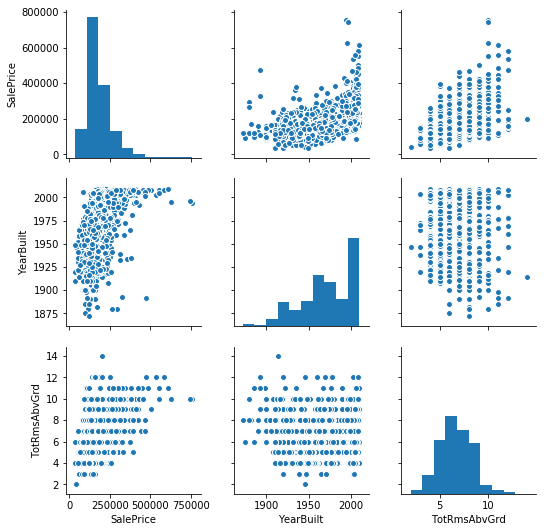

In [115]:
sns.pairplot(winner)

In [128]:
test.rsquared

0.7049108161106492

In [134]:
ames.iloc[284]

Id                   285
MSSubClass           120
MSZoning              RL
LotFrontage           50
LotArea             8012
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     SawyerW
Condition1          Norm
Condition2          Norm
BldgType          TwnhsE
HouseStyle        1Story
OverallQual            6
OverallCond            5
YearBuilt           1992
YearRemodAdd        1992
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      Plywood
Exterior2nd      ImStucc
MasVnrType          None
MasVnrArea             0
ExterQual             Gd
ExterCond             TA
Foundation         PConc
                  ...   
BedroomAbvGr           2
KitchenAbvGr           1
KitchenQual           Gd
TotRmsAbvGrd           5
Functional           Typ
Fireplaces             0
FireplaceQu          NaN
GarageType        Attchd
GarageYrBlt         1992


In [142]:
np.polyval(test, (ames.iloc[284][['SalePrice', 'Neighborhood' , 'BldgType' , 'YearBuilt' , 'TotRmsAbvGrd']]

SyntaxError: unexpected EOF while parsing (<ipython-input-142-6d5fc6b5fedc>, line 1)

In [138]:
winner.iloc[284]

SalePrice        179200
Neighborhood    SawyerW
BldgType         TwnhsE
YearBuilt          1992
TotRmsAbvGrd          5
Name: 284, dtype: object

In [139]:
winnerline = winner.iloc[284]

In [141]:
winnerline.head()

SalePrice        179200
Neighborhood    SawyerW
BldgType         TwnhsE
YearBuilt          1992
TotRmsAbvGrd          5
Name: 284, dtype: object

In [143]:
test.predict(ames).iloc[284]

139502.75347371135